# Initial data exploration

In [1]:
import pandas as pd
import sys
sys.path.append('..')  # Move one level up in the directory structure
from src.data.get_dataset import get_merged_datasets

merged_df = get_merged_datasets()

### Focusing on >=2000 & Has ISO CODE & GDP data

In [4]:
countries_with_co2_data = merged_df.dropna(subset=['co2' ])

In [5]:
countries_with_co2_data.shape

(2705, 234)

In [6]:
century_21 = countries_with_co2_data [countries_with_co2_data ['year']>=2000]
#century_21
with pd.option_context('display.max_rows', None):
    print(century_21.isnull().sum())

country                                                                                 0
year                                                                                    0
iso_code                                                                                0
population                                                                              0
gdp                                                                                     0
cement_co2                                                                             73
cement_co2_per_capita                                                                  73
co2                                                                                     0
co2_growth_abs                                                                          0
co2_growth_prct                                                                         0
co2_including_luc                                                                       0
co2_includ

In [20]:
century_21.to_csv('country_CO2_and_energy_2000to2018.csv',index=False)

In [21]:
# Selecting only numeric columns
numeric_cols = century_21.select_dtypes(include=['number']).columns.tolist()
non_numeric_cols = century_21.select_dtypes(exclude=["number"]).columns.tolist()
print(numeric_cols)
print(non_numeric_cols)

['year', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita', 'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita', 'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita', 'oil_co2', 'oil_co2_per

> Based on our analysis, the only non numeric values are that of country, and year neither of which are viable labels.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.impute import SimpleImputer

# Assuming 'century_21' is your DataFrame with missing values

# Using only the numeric columns for training
X = century_21[numeric_cols]
y = century_21['co2']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean of each column, we want to 
# impute after our data is split so as to avoid new data bias showing up in training data. 
imputer = SimpleImputer(strategy='median')
X_train= imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
predictions_train = model.predict(X_train)

# Evaluating the model using mean squared error
mse = mean_squared_error(y_train, predictions_train)
print(f"Mean Squared Error: {mse}")

# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluating the model using mean squared error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 404.5583256408093
Mean Squared Error: 441.62611842152006


C:\ProgramData\anaconda3\envs\co2-emission-ML\lib\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['Median age - Sex: all - Age: all - Variant: medium']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\ProgramData\anaconda3\envs\co2-emission-ML\lib\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['Median age - Sex: all - Age: all - Variant: medium']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


> Based on our analysis, the only non numeric values are that of country, and year neither of which are viable labels.

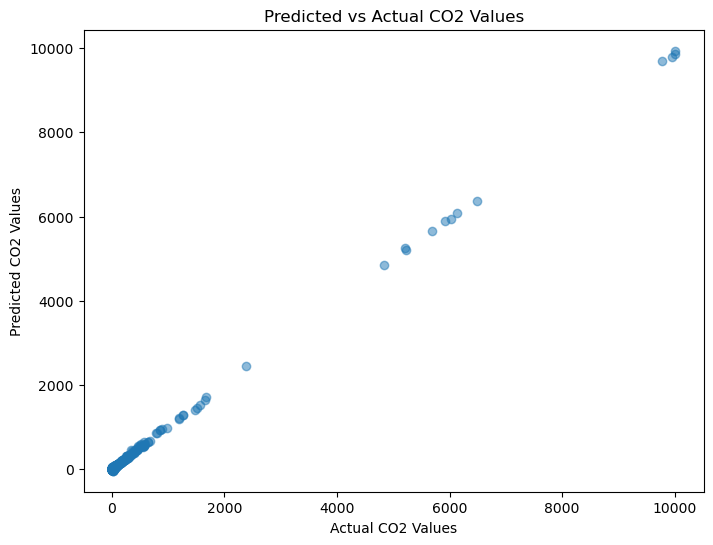

In [27]:
import matplotlib.pyplot as plt

# Plotting predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual CO2 Values')
plt.ylabel('Predicted CO2 Values')
plt.title('Predicted vs Actual CO2 Values')
plt.show()

In [29]:
predictor_variables = numeric_cols  # Assuming you've defined 'numeric_cols' previously

# Get the coefficients for each feature
coefficients = model.coef_

# Combine predictor variables and their coefficients
variable_coefficient = list(zip(predictor_variables, coefficients))

# Sort the variables by the absolute value of coefficients in ascending order
sorted_vars_coef = sorted(variable_coefficient, key=lambda x: abs(x[1]))

# Print the sorted list of predictor variables and their coefficients
for var, coef in sorted_vars_coef:
    print(f"{var}: {coef}")

gas_prod_change_pct: -1.1275702593849246e-17
gdp: 2.8029873222109113e-11
Forest land Area in hectares: 9.59891955920611e-08
temperature_change_from_co2: -2.4396302680669416e-07
Agricultural land Area in hectares: 3.3608118005235e-07
Cropland Area in hectares: -7.224853571935475e-07
temperature_change_from_n2o: 8.984005372772951e-07
temperature_change_from_ch4: -9.965597563519628e-07
temperature_change_from_ghg: 4.02534983831108e-06
oil_prod_per_capita: 2.0967927680540233e-05
gas_energy_per_capita: -3.514738850335375e-05
oil_energy_per_capita: -4.493097458024842e-05
gas_prod_per_capita: -5.39703043410944e-05
fossil_energy_per_capita: 6.664920618327033e-05
other_co2_per_capita: -8.073867222205737e-05
co2_per_unit_energy: 0.00011968581763921807
per_capita_electricity: -0.00014342266320117175
flaring_co2_per_capita: -0.00014732410941056424
coal_cons_per_capita: -0.00014969143678460195
energy_per_capita: 0.0002738160234119144
solar_share_energy: 0.00036428381442815493
renewables_share_elec:

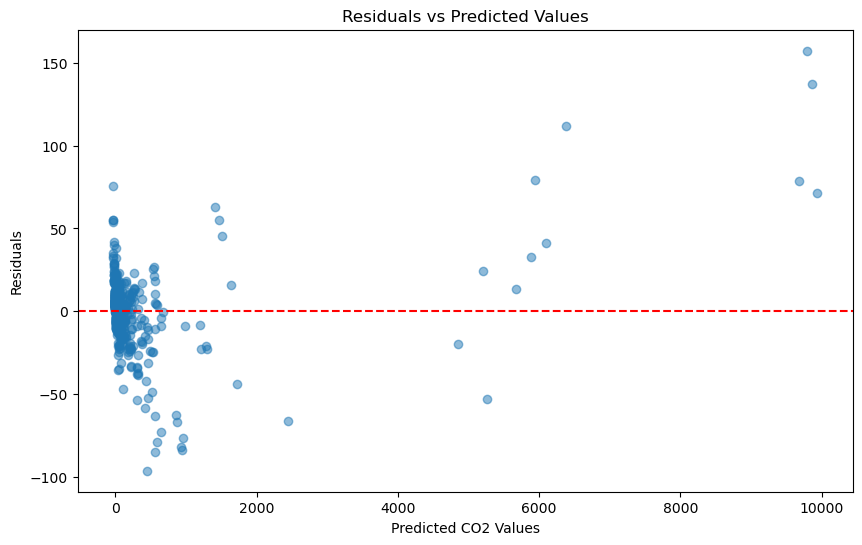

In [30]:


# Assuming you have your actual and predicted values as follows:
actual_values = y_test
predicted_values = predictions

# Calculate residuals
residuals = actual_values - predicted_values

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals, alpha=0.5)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted CO2 Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Adds a horizontal line at zero
plt.show()


In [26]:
from sklearn.metrics import r2_score

# Assuming 'y_test' contains the actual 'co2' values and 'predictions' contains the predicted values

# Calculate R-squared
r_squared = r2_score(y_test, predictions)
print(f"R-squared: {r_squared}")


R-squared: 0.999585325546549
